# Data-Set Initial Pre-Processing

This notebook takes a sample of each image and explores ways to process the images.

## Author: Alexander Goudemond, Student Number: 219030365

# Initial Observations

This section of the notebook considers the information gathered from 002.

Referring to the 002 notebook, we can look at the videos and deduce the following:

For understanding, here is a broad breakdown of the data-sets:

| Data-Set Name   | Cell Description                    | Notes |
|-----------------|-------------------------------------|-------|
| BF-C2DL-HSC     | Mouse Stem Cells                    | Gray Background;  Circular Viewing Area inside frame ; Consistent Cell Shape   |
| BF-C2DL-MuSC    | Mouse Stem Cells                    | Gray Background;  Circular Viewing Area inside frame ; Inconsistent Cell Shape |
| DIC-C2DH-HeLa   | HeLa Cells                          | Gray Background;  Circular Viewing Area inside frame ; Inconsistent Cell Shape |
| Fluo-C2DL-Huh7  | Derived Liver Cells                 | Gray Background;  Frame is Viewing Area              ; Consistent Cell Shape   |
| Fluo-C2DL-MSC   | Rat Derived Bone-Marrow Stem Cells  | Black Background; Frame is Viewing Area              ; Inconsistent Cell Shape |
| Fluo-N2DH-GOWT1 | Mouse Embryonic Stem Cells          | Black Background; Frame is Viewing Area              ; Consistent Cell Shape   |
| Fluo-N2DH-SIM+  | (Simulated) Derived Blood Cells     | Black Background; Frame is Viewing Area              ; Consistent Cell Shape   |
| Fluo-N2DL-HeLa  | HeLa Cells                          | Gray Background;  Frame is Viewing Area              ; Consistent Cell Shape   |
| PhC-C2DH-U373   | Brain Tumour Cells                  | Gray Background;  Frame is Viewing Area              ; Inconsistent Cell Shape |
| PhC-C2DL-PSC    | Pancreatic Stem Cells               | Gray Background;  Frame is Viewing Area              ; Consistent Cell Shape   |


For understanding, here is a feature breakdown of the data-sets:

| Data-Set Name   | Cell Description                    | Notes |
|-----------------|-------------------------------------|-------|
| BF-C2DL-HSC     | Mouse Stem Cells                    | Small Cells  ; No staining |
| BF-C2DL-MuSC    | Mouse Stem Cells                    | Small Cells  ; No staining      ; Cell changes form often |
| DIC-C2DH-HeLa   | HeLa Cells                          | Large Cells  ; No staining      ; Clustered together ; Poor visibility |
| Fluo-C2DL-Huh7  | Derived Liver Cells                 | Medium Cells ; Staining         ; |
| Fluo-C2DL-MSC   | Rat Derived Bone-Marrow Stem Cells  | Large Cells  ; No staining      ; Camera Shake |
| Fluo-N2DH-GOWT1 | Mouse Embryonic Stem Cells          | Medium Cells ; Partial staining ;  |
| Fluo-N2DH-SIM+  | (Simulated) Derived Blood Cells     | Medium Cells ; Partial staining ; Inconsistent lighting |
| Fluo-N2DL-HeLa  | HeLa Cells                          | Medium Cells ; No staining      ; Tightly Packed ; Poor visibility  |
| PhC-C2DH-U373   | Brain Tumour Cells                  | Medium Cells ; Partial staining ; Many particles |
| PhC-C2DL-PSC    | Pancreatic Stem Cells               | Small Cells  ; No staining      ; Tightly Packed |
 

There were other conclusions mentioned in 002 as well, which are mentioned here as well:

## Previous Conclusions

The Data-Set has 2 folders, one contains the original zipped data, and the other the extracted data.

The extracted data is broken up into 2 sets: Training Data, and Challenge Data. The Challenge Data is indicated with a (1) in the folder name.

The distinction between the Training Data and the Challenge Data is that the Training Data contains additional folders of manual segmentation and manual tracking of the images. This will be useful later on when training the models.

To assist with understanding of the data, the author has created a Matplotlib plot showing 10 samples of the images from the 10 data sets (Training Data)

The author has also generated Videos of each folder, in both colour and grayscale, to show the movement of the cells over time.

Much later on, we will create these files in a similar way in order to show tracking and segmentation!

The most significant findings from the work is: The pictures may need to be read in via Matplotlib, and saved onto disk in order for OpenCV to register the information in the image. 

The author is not entirely sure why this is necessary, but it may be the case that the images are saved in a format that OpenCV struggles to process. Whatever the reason is though, one of the processing tips may be to do a bulk save of all images via Matplotlib first!

# Test Images Generation

This section of the notebook looks at 10 images, 1 from each category of the data-set.

Now, let us create a variable containing the 10 test images. We will read them in and view them using Matplotlib.pyplot, as a result of the conclusions from 002

In [1]:
import matplotlib.pyplot as plt

from os import walk, getcwd, mkdir, remove
from os.path import join, exists

import cv2

from shutil import move # moves and replaces files

In [2]:
'''
We only need to show every _OTHER_ folder, as each data-set has a 
 training and challenge set. So out of 20 files, we need to show 10

First things first, let us create an array of the directory locations
'''

data_sets = "..\\..\\Comp700_DataSets"
current_directory = getcwd()

path = walk(current_directory + "\\" + data_sets)

directory_array = [] # contains the main folders

i = 1
for root, dirs, files in path:
    if (i == 2):
        directory_array = dirs
        break
    
    i += 1

print("Directory Array")
print(directory_array)


Directory Array
['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC (1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa (1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7 (1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC (1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1 (1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+ (1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa (1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373 (1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC (1)']


In [3]:
# Now, generate the array of images
test_images = []

i = -1
temp = -1
for root, dirs, files in path:
    # print(dirs)
    for item in files:
        # only execute for first picture in directory
        if ("t0000.tif" == item) or ("t000.tif" == item):
            i += 1

            # skips folder "02" in data-sets
            if (i % 2 == 1):
                break
                
            # print(i)
            temp = i // 2

            # skip Challenge data-sets
            if ("(1)" in directory_array[temp]):
                break

            location = ( current_directory + "\\" + data_sets + "\\Extracted\\" + directory_array[temp] + 
                        "\\" + directory_array[temp] + "\\01\\" + item)
            # print(location)

            img = plt.imread(location)

            test_images.append(img) # place into array

            break

        else:
            break


In [4]:
# generate labels for test_images
label_array = []

for i in range(20):
    if (i % 2 == 0):
        label_array.append(directory_array[i])

print("\nLabel Array")
print(label_array)



Label Array
['BF-C2DL-HSC', 'BF-C2DL-MuSC', 'DIC-C2DH-HeLa', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-MSC', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-SIM+', 'Fluo-N2DL-HeLa', 'PhC-C2DH-U373', 'PhC-C2DL-PSC']


In [5]:
# create directory for work we create
def tryMakeDirectory(current_directory, destination_directory):
    try:
        # join comes from os.path
        mkdir( join(current_directory, destination_directory) )
    except FileExistsError:
        print("Folder already exists!")
        pass
    except:
        print("Unknown Error Encountered...")

Folder already exists!


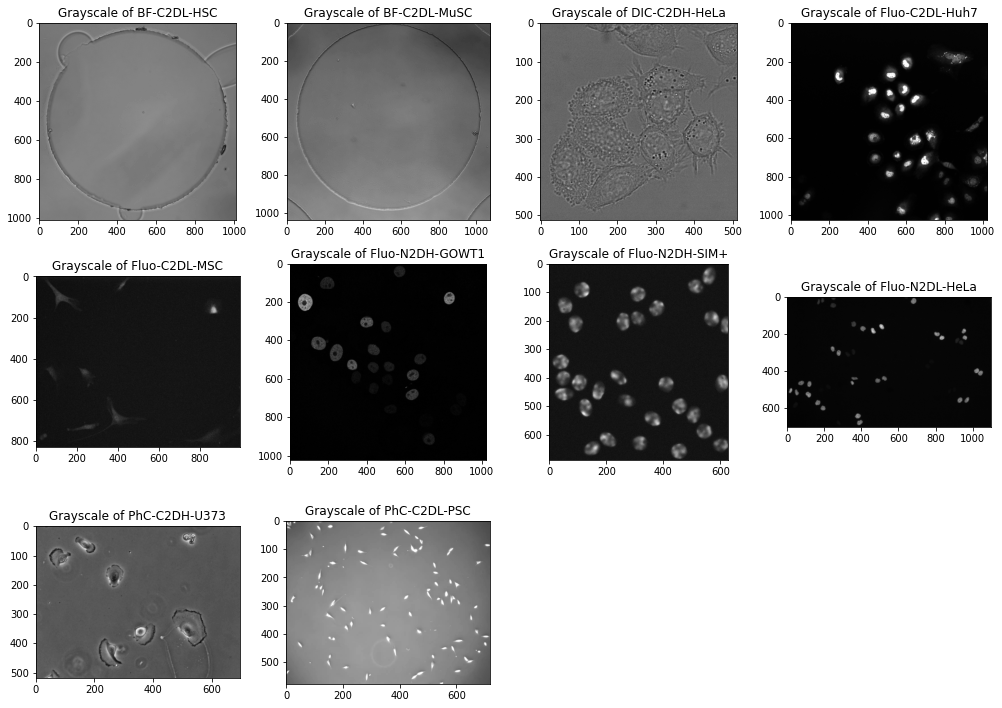

In [6]:
fig = plt.figure(figsize=(14, 10))

for i in range(10):    
    fig.add_subplot(3, 4, i+1)
    plt.title("Grayscale of " + label_array[i])
    plt.imshow(test_images[i], cmap="gray")

plt.tight_layout()

# save file for future use
desired_directory = "InitialPreProcessing"
# local function
tryMakeDirectory(current_directory, desired_directory)
plt.savefig(desired_directory + "\\" + "Visualization_Of_Cells.jpg")

plt.show()

We now have the following useful variables:

_test\_images_, _label\_array_, _current\_directory_, _desired\_directory_

# Test Images Colour Options

This section of the notebook looks at how the data interacts when viewed with different colourmaps

From 002, there were several colourmaps that looked promising:

In [7]:
colour_choices = ['binary', 'gist_yarg', 'gist_gray', 'gray', 'Greys', 'Accent', 'Set2', 'bwr', 
                    'nipy_spectral', 'seismic', 'Pastel1', 'Pastel2', 'gist_earth']

print(len(colour_choices))

13


For example, here is a display on a simulated image:


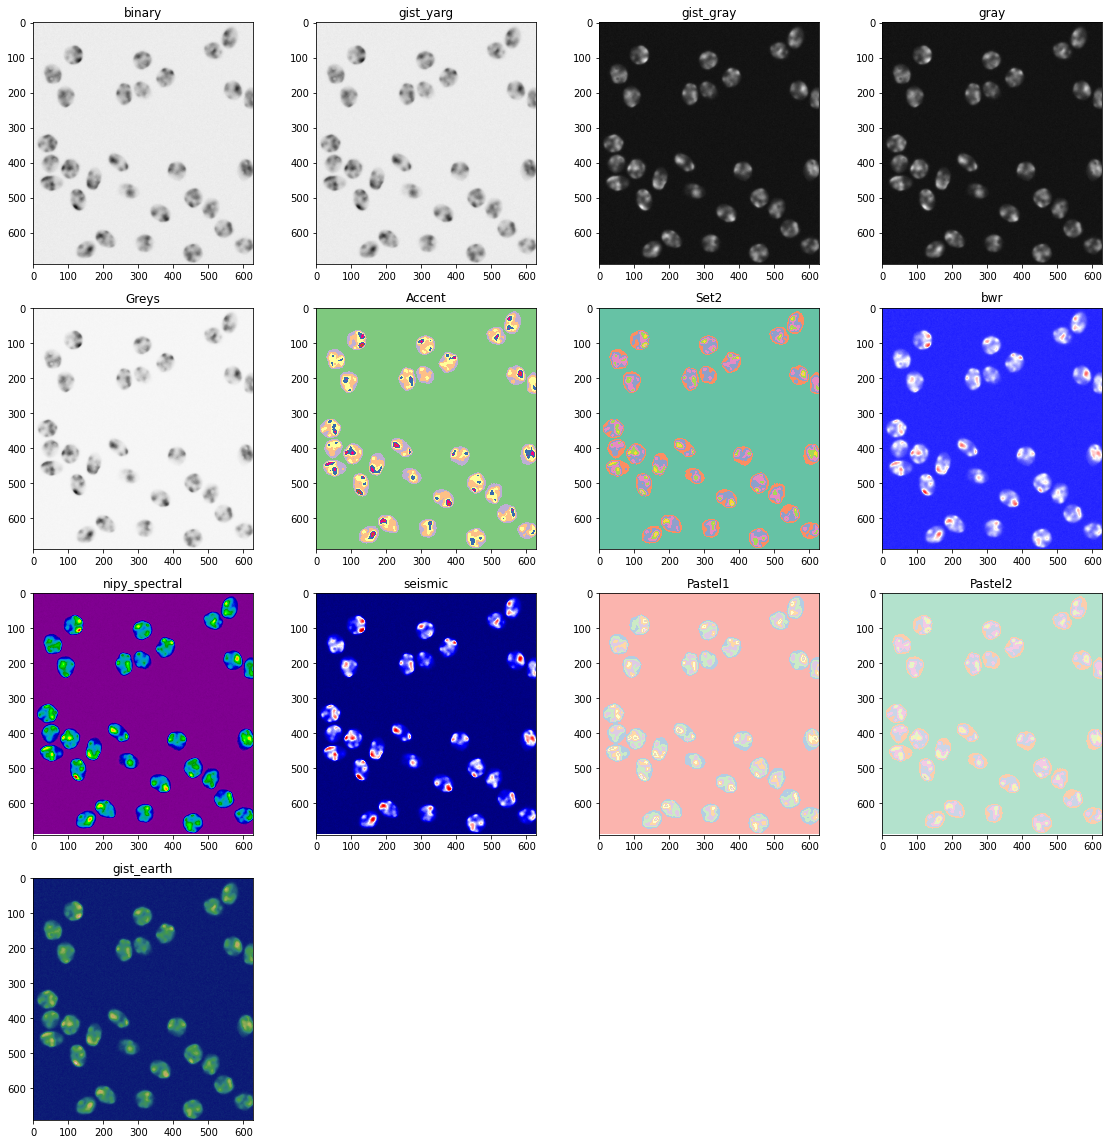

In [8]:
rgb_img = plt.imread( current_directory + "\\DataSetExploration\\SimulatedSamples\\t000.tif" )

fig = plt.figure(figsize=(16, 16))

for i in range(len(colour_choices)):   
    fig.add_subplot(4, 4, i+1)
    plt.title(colour_choices[i])
    plt.imshow(rgb_img, cmap=colour_choices[i])

plt.tight_layout()
plt.show()

Upon closer inspection, 'binary', 'gist_yarg', 'Greys' are virtually identical, as well as 'gist_gray' and 'gray'. However, for the 10 images we will look at the 13 options closely to confirm this:

In [9]:
def printColourSamples(i):
    image = test_images[i]

    fig = plt.figure(figsize=(16, 16))

    for i in range(len(colour_choices)):   
        fig.add_subplot(4, 4, i+1)
        plt.title(colour_choices[i])
        plt.imshow(image, cmap=colour_choices[i])

    plt.tight_layout()
    plt.show()

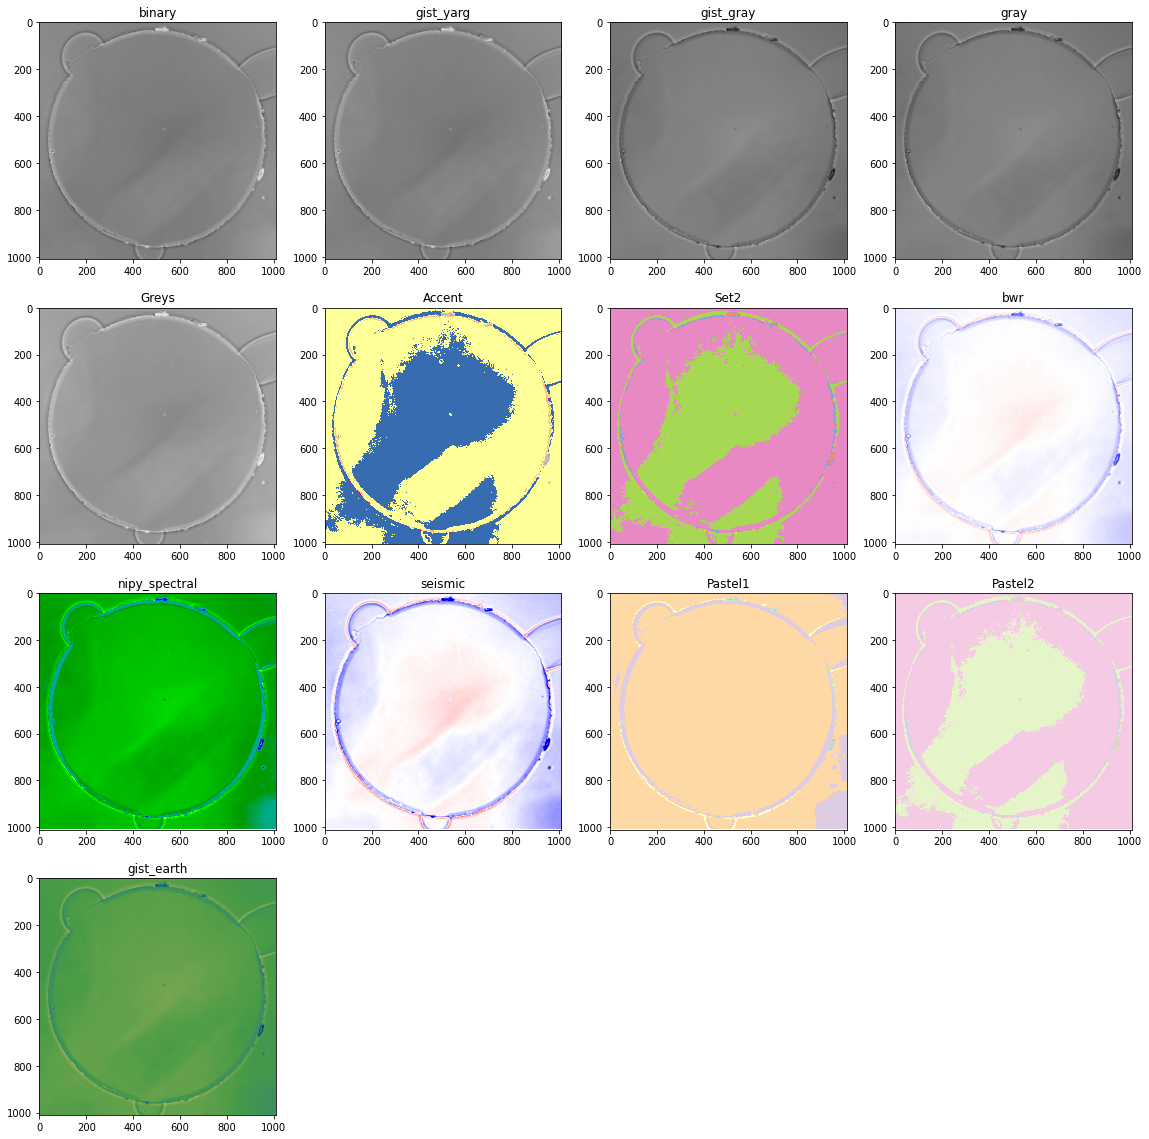

In [10]:
# local function
printColourSamples(0)

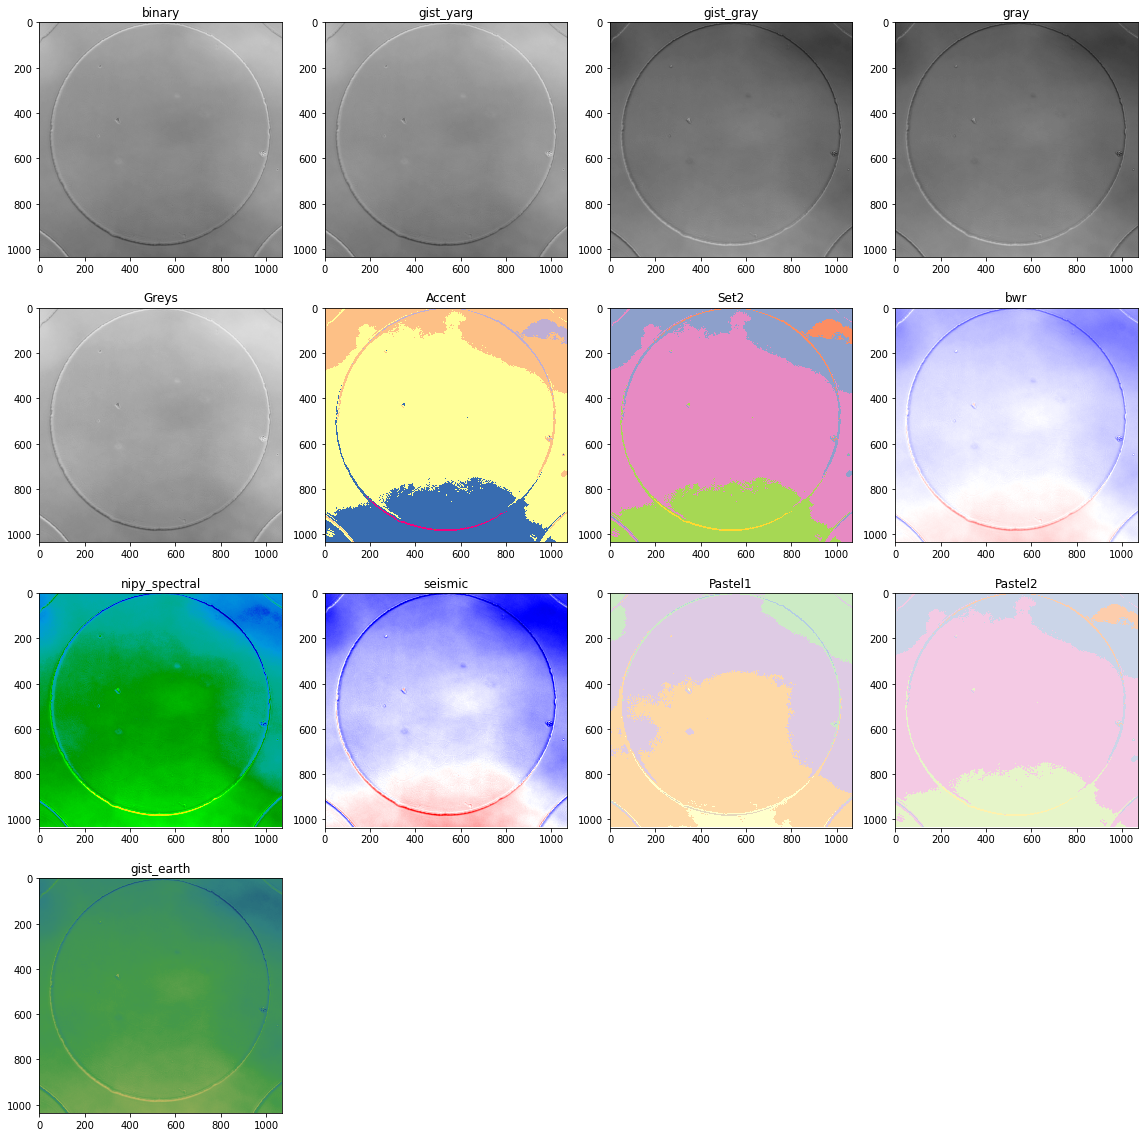

In [11]:
# local function
printColourSamples(1)

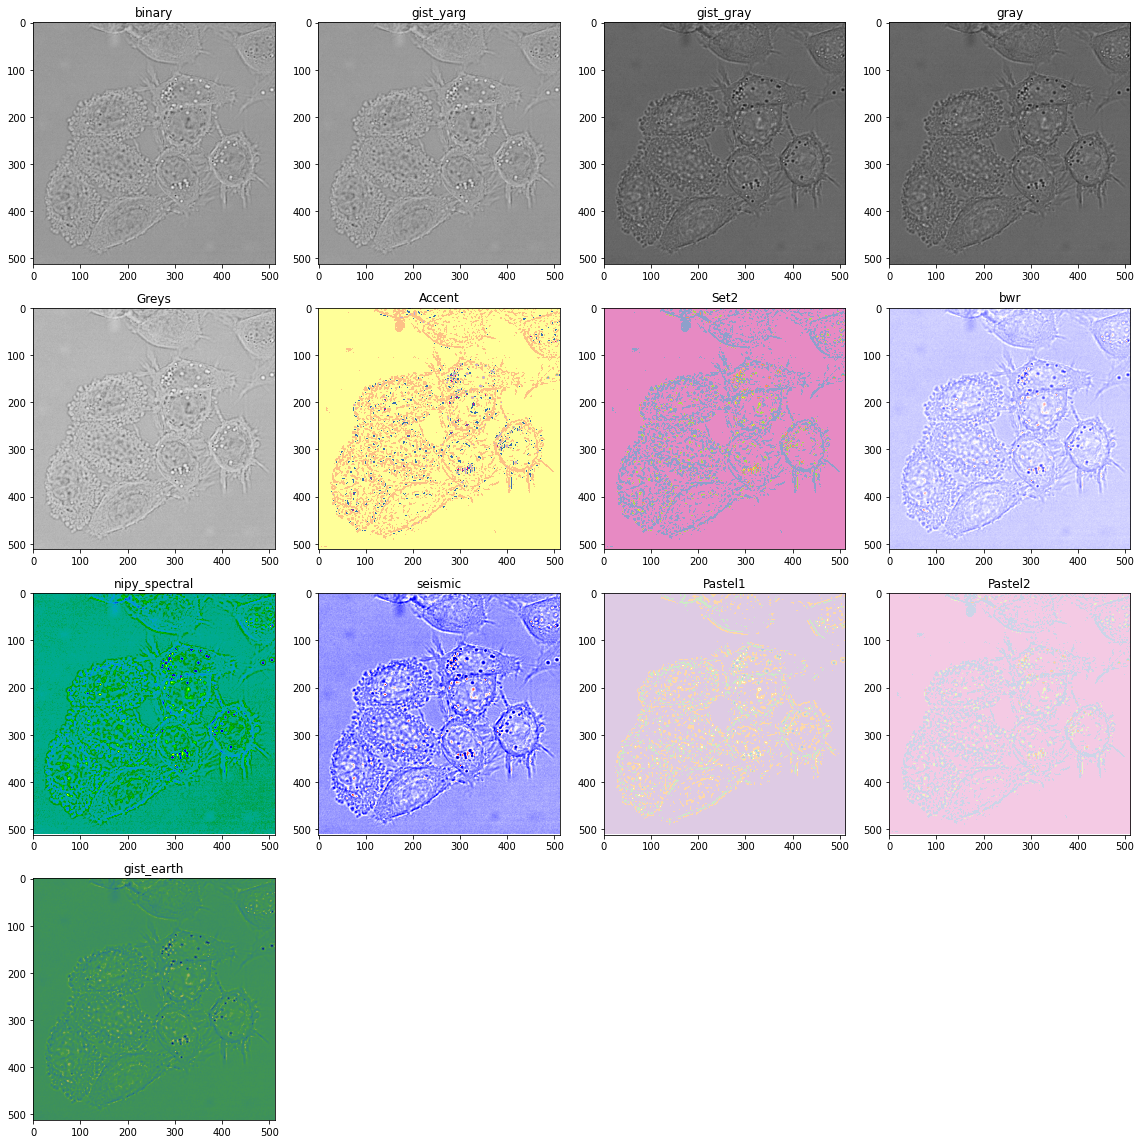

In [12]:
# local function
printColourSamples(2)

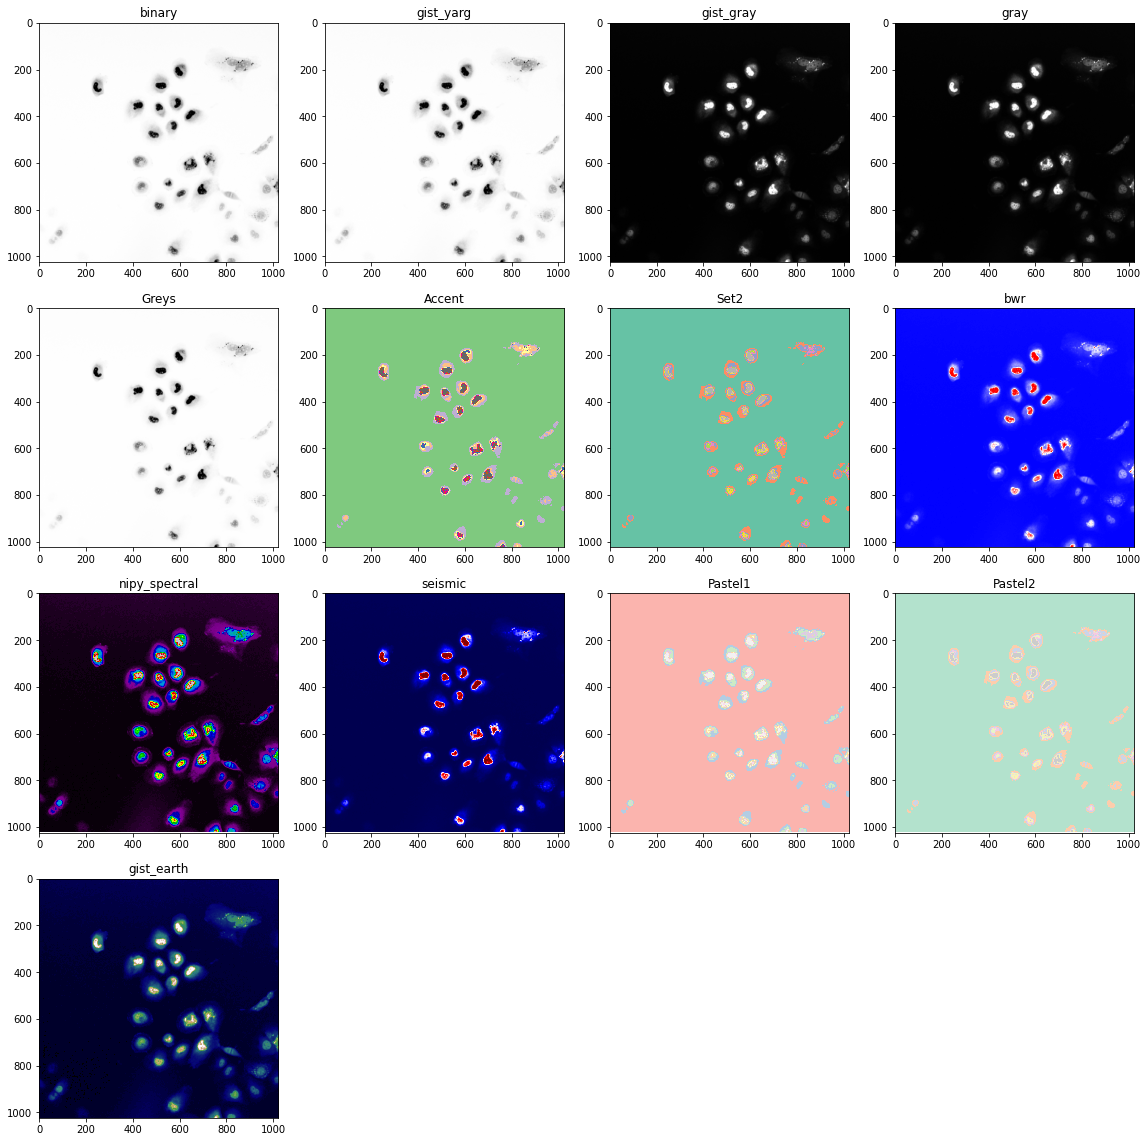

In [13]:
# local function
printColourSamples(3)

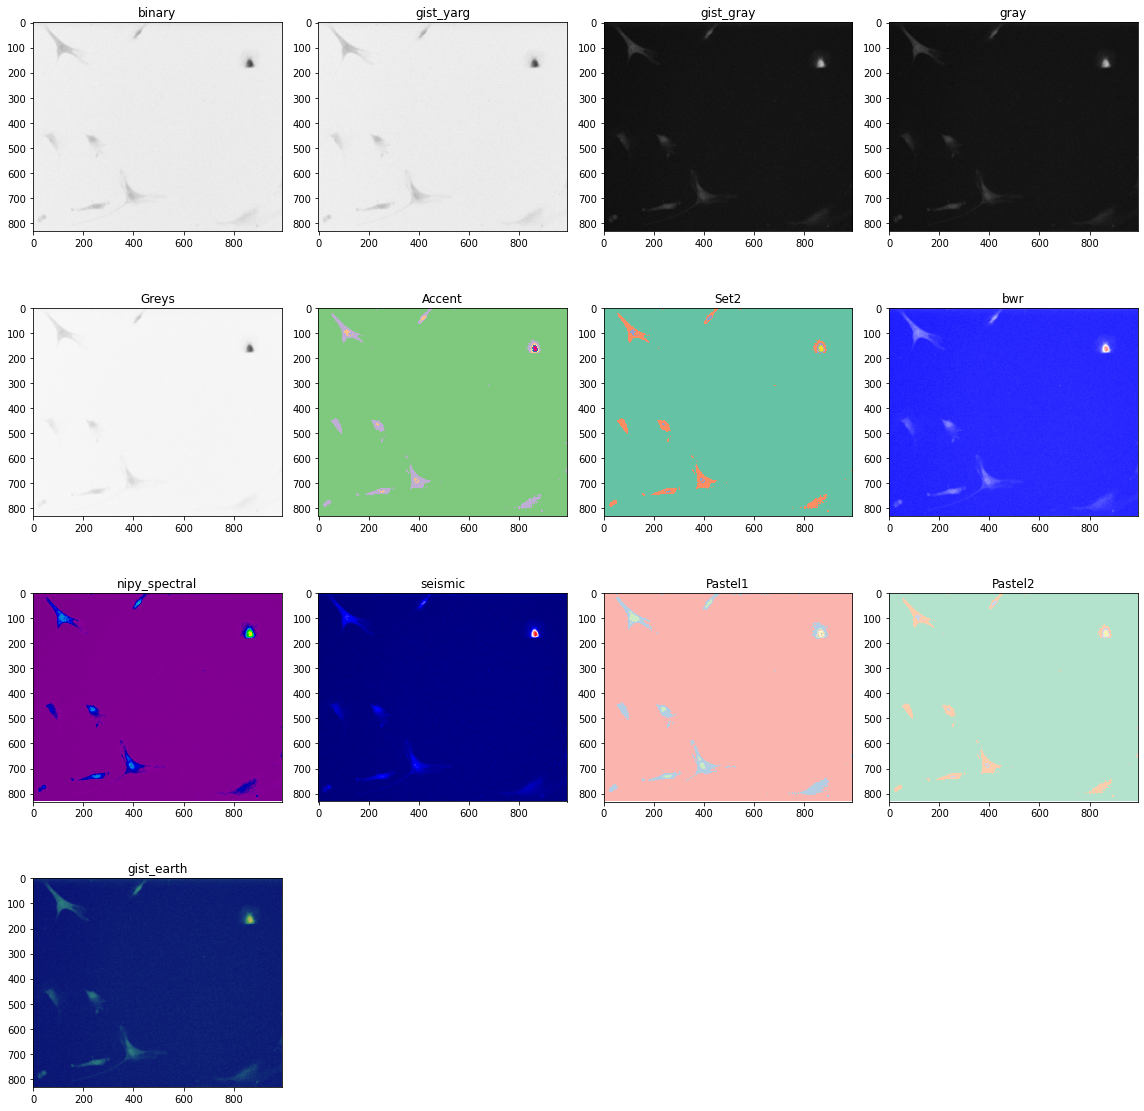

In [14]:
# local function
printColourSamples(4)

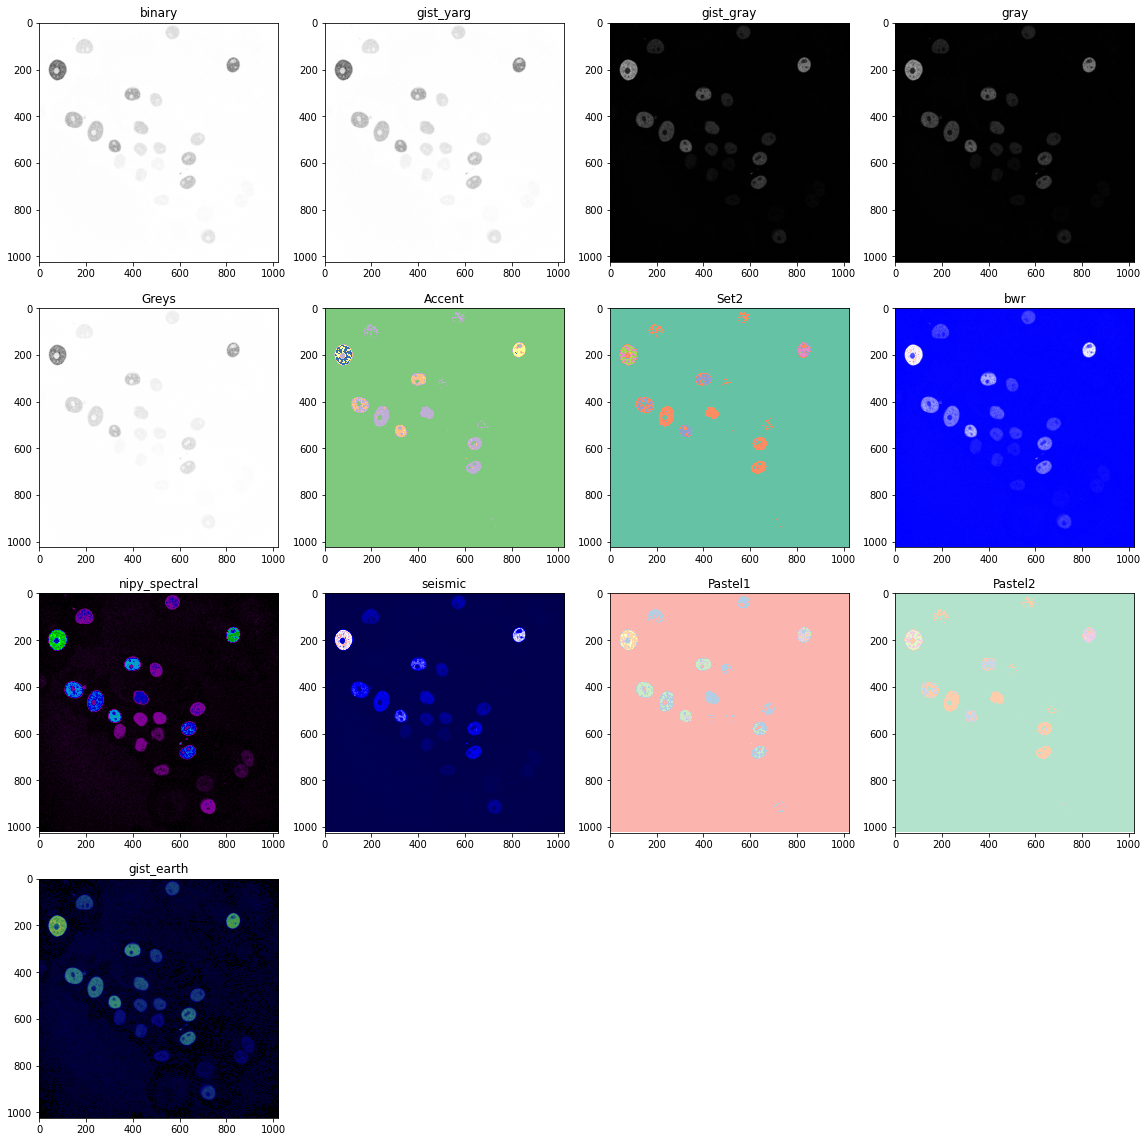

In [15]:
# local function
printColourSamples(5)

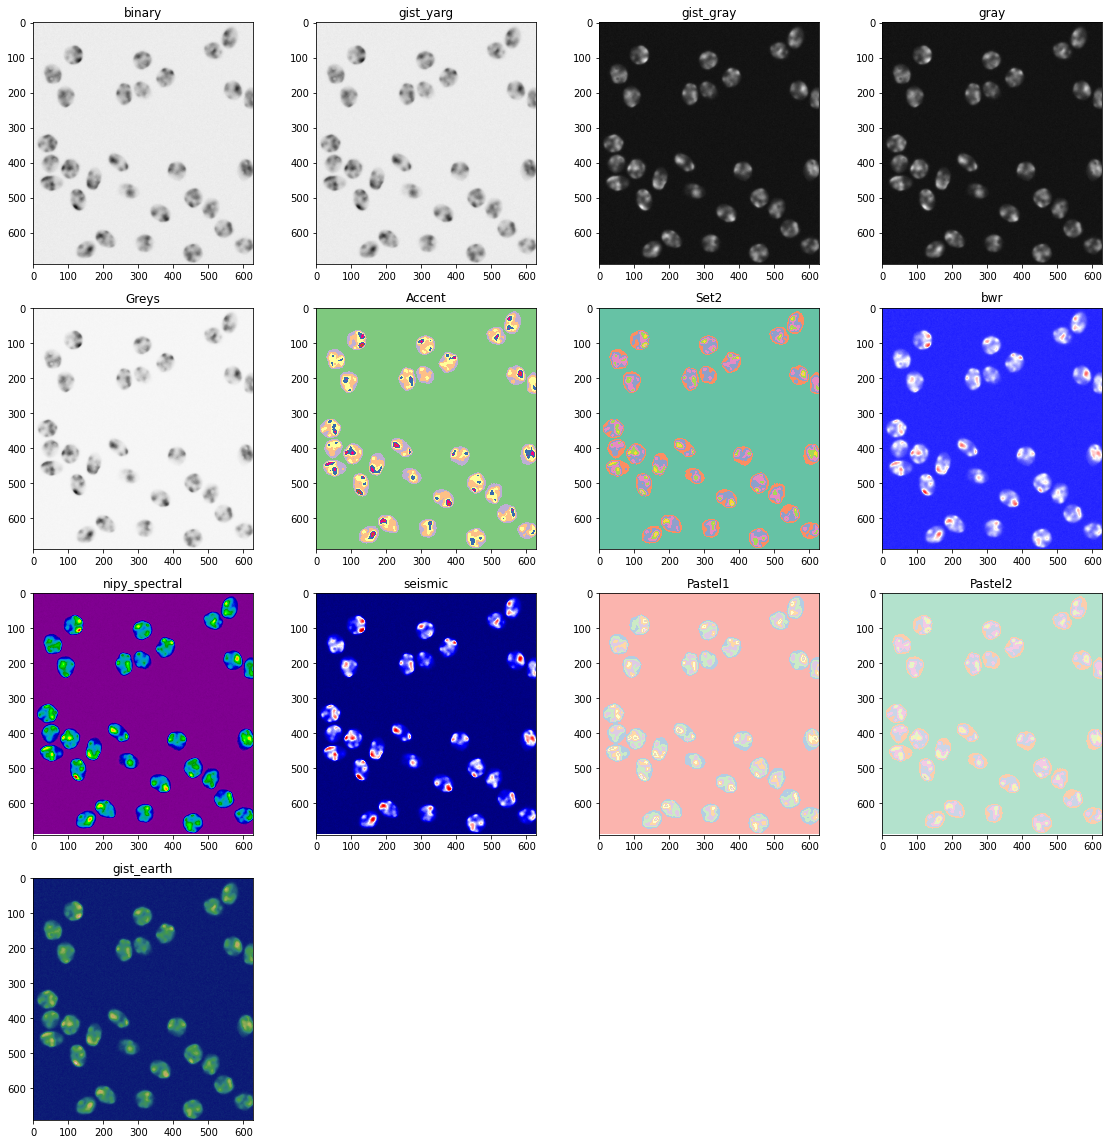

In [16]:
# local function
printColourSamples(6)

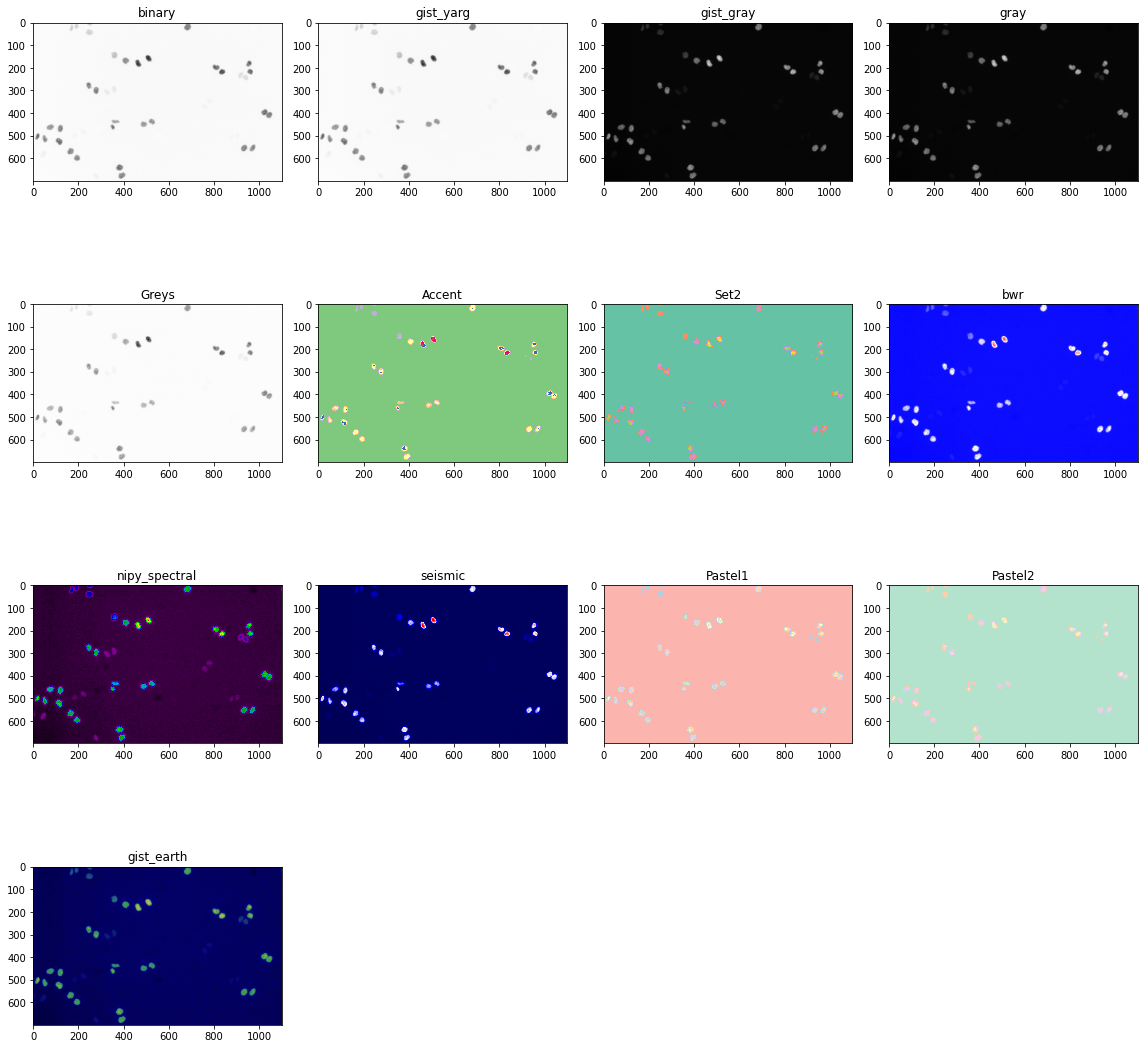

In [17]:
# local function
printColourSamples(7)

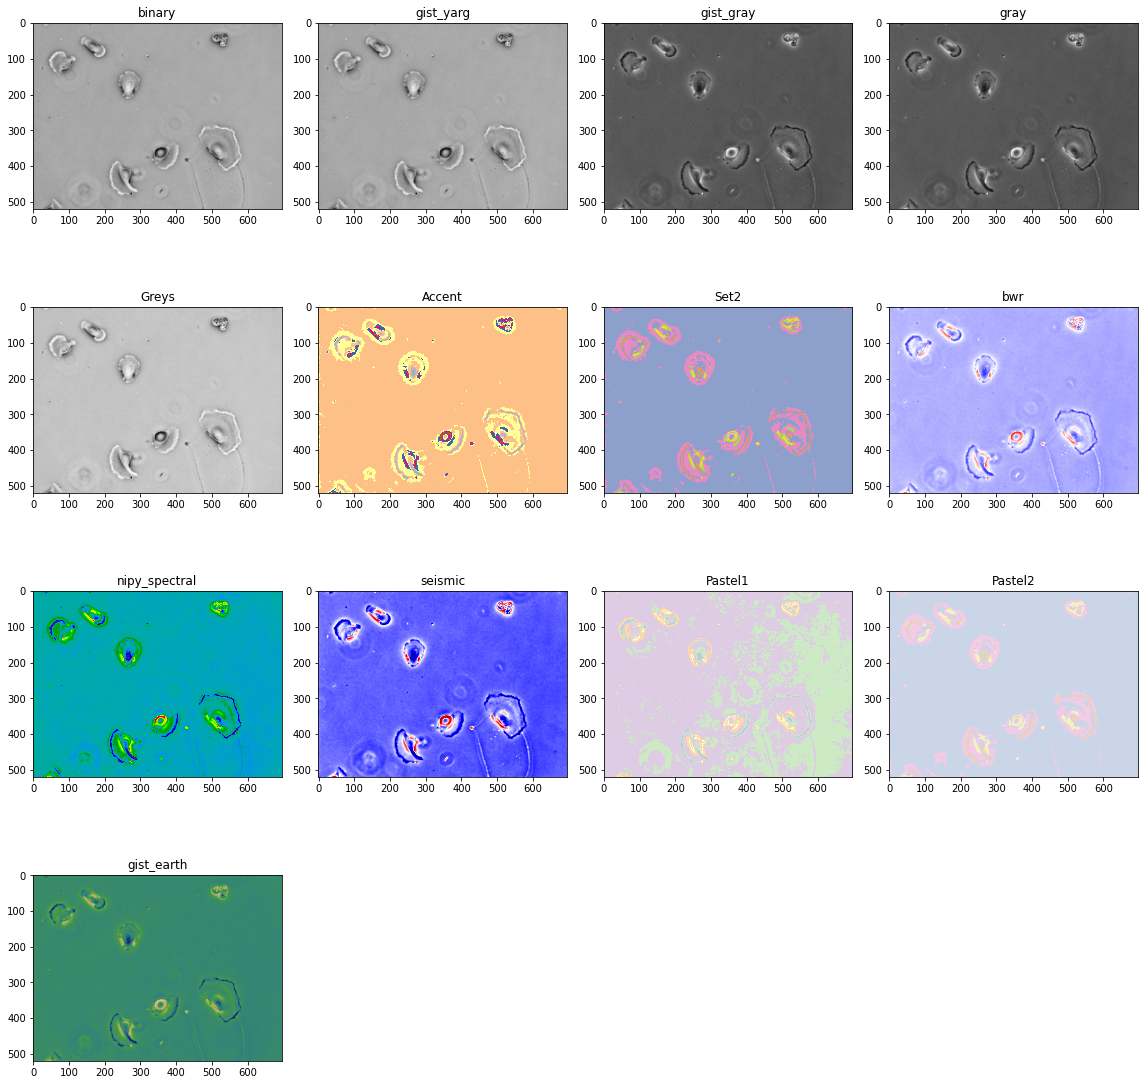

In [18]:
# local function
printColourSamples(8)

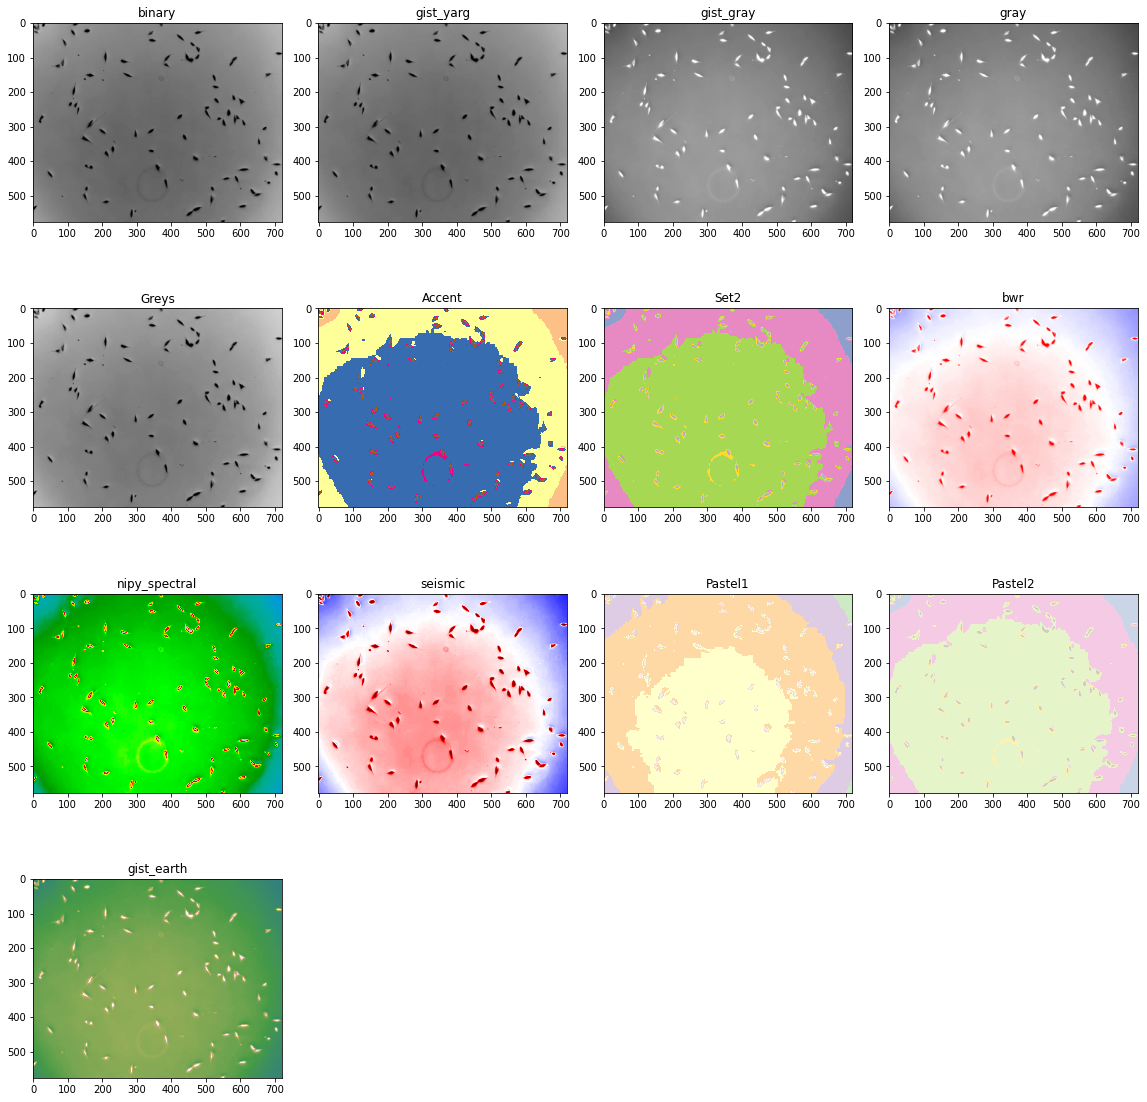

In [19]:
# local function
printColourSamples(9)

Indeed, 'binary', 'gist_yarg', 'Greys' are virtually identical, as well as 'gist_gray' and 'gray'

From the above pictures, we can summarise the results of the other colours in the following table:

| Code |  Description      |
|------|-------------------|
| 1    | BF-C2DL-HSC       |
| 2    | BF-C2DL-MuSC      |
| 3    | DIC-C2DH-HeLa     |
| 4    | Fluo-C2DL-Huh7    |
| 5    | Fluo-C2DL-MSC     |
| 6    | Fluo-N2DH-GOWT1   |
| 7    | Fluo-N2DH-SIM+    |
| 8    | Fluo-N2DL-HeLa    |
| 9    | PhC-C2DH-U373     |
| 10   | PhC-C2DL-PSC      |
| Y    | Yes, good quality |
| N    | No, poor quality  |
| O    | Okay quality      |

And the summarised results:

|               | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|---------------|---|---|---|---|---|---|---|---|---|----|
| Accent        | N | N | N | O | Y | N | Y | O | O | N |
| Set2          | N | N | O | O | Y | Y | Y | Y | Y | N |
| bwr           | N | N | Y | Y | Y | Y | Y | Y | Y | O |
| nipy_spectral | O | O | N | O | Y | Y | Y | Y | O | O |
| seismic       | N | O | O | Y | Y | Y | Y | Y | Y | O |
| Pastel1       | N | N | N | Y | Y | Y | Y | Y | N | N |
| Pastel2       | N | N | N | Y | Y | Y | Y | Y | O | N |
| gist_earth    | O | O | O | Y | Y | Y | Y | Y | Y | O |

Paying attention to the rows:

|               | N | O | Y |  
|---------------|---|---|---|
| Accent        | 5 | 3 | 2 |
| Set2          | 3 | 2 | 5 |
| bwr           | 2 | 1 | 7 |
| nipy_spectral | 1 | 5 | 4 |
| seismic       | 1 | 3 | 6 |
| Pastel1       | 5 | 5 | 0 |
| Pastel2       | 4 | 1 | 5 |
| gist_earth    | 0 | 4 | 6 |


If we pay attention to the colour choices above...

The best performing colours appear to be bwr, seismic and gits_earth, Set2

The worst performing colours appear to be Accent, Pastel1 and Pastel2

nipy_spectral is a colour with midex results.

Let us use the 4 best performing colours, as well as gray and Greys to compare all pictures together:

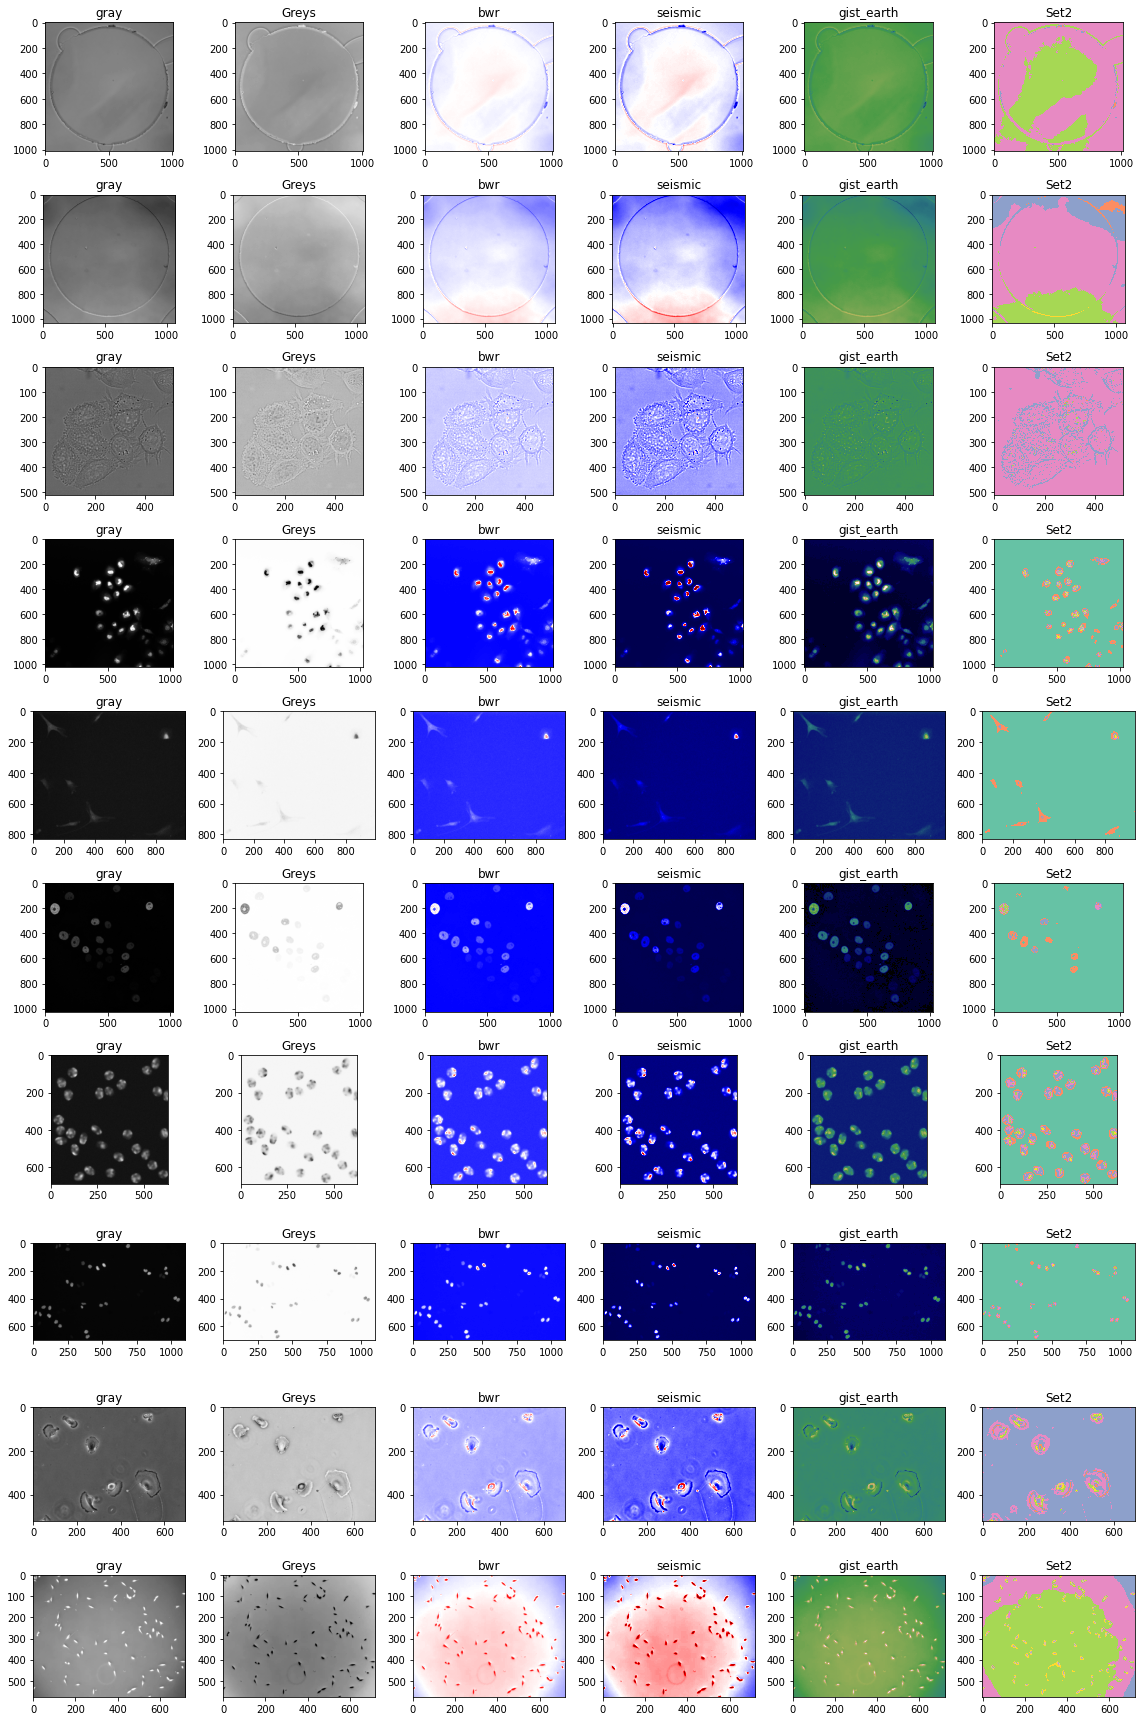

In [20]:
cmaps = ["gray", "Greys", "bwr", "seismic", "gist_earth", "Set2"]

fig = plt.figure(figsize=(16, 24))

position = 0
for i in range(10):
    image = test_images[i]    

    for j in range(len(cmaps)):   
        position += 1
        fig.add_subplot(10, 6, position)
        plt.title(cmaps[j])
        plt.imshow(image, cmap=cmaps[j])

plt.tight_layout()
plt.show()

Looking at the overall comparison between the 6 colourmaps, Greys appears to br reliable at brightening up most images, seismic may be interesting to see the information as a heat map.

bwr is similar to seismic, and appears slightly lighter.

gist_earth may not assist with the first 3 data-sets, and set2 does appear to be reliable.

So we will move forward with the 2 colourmaps: Greys and seismic

# Seismic and Greys Videos

This section of the notebook focusses on generating 2 additional videos: Greys and Seismic

First, let us create an a few arrays for the information we need:

In [21]:
# a list of the directories - will be used to name the videos
print(directory_array)

['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC (1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa (1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7 (1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC (1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1 (1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+ (1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa (1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373 (1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC (1)']


Locations:

In [22]:
# First, generate a list of the locations for each folder of Petri Dish images

path = walk(current_directory + "\\" + data_sets) # reset path

location_array = []

# used to cycle between 2 folders, present in each directory
sub_directory_choice = ["\\01\\", "\\02\\"]

i = 0 # will grow from 0 to 39
index = 0 # we need to lie in [0, 19]
for root, dirs, files in path:
    # print(dirs)
    for item in files:
        if ("t0000.tif" == item) or ("t000.tif" == item):
            index = i // 2

            location = ( current_directory + "\\" + data_sets + "\\Extracted\\" + directory_array[index] + 
                        "\\" + directory_array[index] + sub_directory_choice[i % 2])
            
            i += 1
            # print(location)
            location_array.append(location)

print(location_array)



['c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\01\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\02\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-MuSC\\BF-C2DL-MuSC\\01\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-MuSC\\BF-C2DL-MuSC\\02\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-MuSC (1)\\BF-C2DL-MuSC (1)\\01\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-MuSC (1)\\BF-C2DL-MuSC (1)\\02\\', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\

The cell below verifies that all cells have exactly 1 set of dimensions across the folder. It may take a few minutes to run

In [23]:
# # Now, use the location_array to determine if each data-set has consistent image sizes

# path = walk(current_directory + "\\" + data_sets) # reset path

# temp_array = []

# i = -1 # will grow from 0 to 39
# for root, dirs, files in path:
#     # print(files)
#     for item in files:
#         if ("man_" not in item) and (".zip" not in item):
#             # update on first element only
#             if ("t0000.tif" == item) or ("t000.tif" == item):  
#                 i += 1
            
#             # print(location_array[i] + item, exists(location_array[i] + item))
#             # break

#             img = cv2.imread( (location_array[i] + item), cv2.IMREAD_GRAYSCALE)
#             (x, y) = img.shape

#             # only keep distinct sizes
#             if ([x, y] not in temp_array):
#                 temp_array.append([x, y])
            

#         # skip "man_" images
#         else:
#             break

#     if (len(temp_array) != 0):
#         print(temp_array, end="\t")

#     temp_array = []


From the test above, we can see that the images are already consistent in their dimensions, however the dimensions vary per data-set. We can use this knowledge to just find the dimensions of the first image in each folder, which will be used further on

In [24]:
image_size_array = []

path = walk(current_directory + "\\" + data_sets) # reset path

i = -1 # will grow from 0 to 39
for root, dirs, files in path:
    for item in files:
        if ("man_" not in item) and (".zip" not in item):
            # update on first element only
            if ("t0000.tif" == item) or ("t000.tif" == item):  
                i += 1

            img = cv2.imread( (location_array[i] + item), cv2.IMREAD_GRAYSCALE)
            (x, y) = img.shape

            image_size_array.append([x, y])
            break
            

        # skip "man_" images
        else:
            break

print(image_size_array)


[[1010, 1010], [1010, 1010], [1010, 1010], [1010, 1010], [1036, 1070], [1036, 1070], [1036, 1070], [1036, 1070], [512, 512], [512, 512], [512, 512], [512, 512], [1024, 1024], [1024, 1024], [1024, 1024], [1024, 1024], [832, 992], [782, 1200], [832, 992], [782, 1200], [1024, 1024], [1024, 1024], [1024, 1024], [1024, 1024], [690, 628], [773, 739], [718, 660], [790, 664], [700, 1100], [700, 1100], [700, 1100], [700, 1100], [520, 696], [520, 696], [520, 696], [520, 696], [576, 720], [576, 720], [576, 720], [576, 720]]


Useful functions:

In [25]:

def generateVideos(current_directory, desired_folder, desired_colour, use_colour):
    # only progress if files don't exist
    makeVideos = False

    if (exists(current_directory + "\\" + desired_folder)):
        # Now, go to directory and verify all is there
        path = walk(current_directory + "\\" + desired_folder)

        count = 0
        for root, dirs, files in path:
            for item in files:
                count += 1

        if (count == 40):
            print("All Videos exist already!")
        else:
            print("Not all Videos exist")
            makeVideos = True
    else:
        makeVideos = True
        
    if (makeVideos):
        path = walk(current_directory + "\\" + data_sets) # reset path

        sub_directory_choice = ["01", "02"]

        i = -1
        output_video = cv2.VideoWriter()
        frames_per_second = 10
        petri_dish_images = False

        # Generates Colour Videos
        for root, dirs, files in path:
            for item in files:
                if ("man_" not in item) and (".zip" not in item):
                    # update on first element only
                    if ("t0000.tif" == item) or ("t000.tif" == item):  
                        petri_dish_images = True
                        i += 1
                        index = i // 2 # used for output video as 2 copies for each directory

                        size = (image_size_array[i][1], image_size_array[i][0] ) # notice order
                        fileName = desired_colour + "_" + directory_array[index] + "_" + sub_directory_choice[i % 2] + ".mp4"
                        
                        output_video = cv2.VideoWriter(
                            fileName, 
                            cv2.VideoWriter_fourcc(*'DIVX'), 
                            frames_per_second, 
                            size,
                            isColor=use_colour # either True or False
                        )

                    img = plt.imread( location_array[i] + item) 
                    plt.imsave("temp.jpg", img, cmap=desired_colour)

                    if (use_colour):
                        img = cv2.imread( "temp.jpg")
                    else:
                        img = cv2.imread( "temp.jpg", cv2.IMREAD_GRAYSCALE)
                        
                    output_video.write(img)

                else:
                    petri_dish_images = False
                    break
                    

            if (petri_dish_images):     
                cv2.destroyAllWindows()
                output_video.release()
                print("Video finished for ", fileName, sep="")
                petri_dish_images = False # update incase next iteration containes empty array
    
    # remove at end
    if (exists("temp.jpg")):
        remove("temp.jpg")

In [26]:
# from os.path import join
# from shutil import move # moves and replaces files

def moveBulkVideos(current_directory, desired_folder):
    # only progress if files don't exist
    if (exists(current_directory + "\\" + desired_folder)):
        print("Videos already exist!")
    else:
        # local function
        tryMakeDirectory(current_directory, desired_folder)

        path = walk(current_directory)

        for root, dirs, files in path:
            for item in files:
                if (".mp4" in item):
                    new_destination = current_directory + "\\" + desired_folder
                    move(join(current_directory, item), join(new_destination, item)) # should overwrite existing data

        # Now, go to directory and verify all is there
        path = walk(current_directory + "\\" + desired_folder)

        count = 0
        for root, dirs, files in path:
            for item in files:
                count += 1

        if (count == 40):
            print("All Videos Moved Successfully!")
        else:
            print("Not all Videos Moves Successfully")

In [27]:
generateVideos(current_directory, "..\\..\\Comp700_VideosOfDataSets_Seismic", "seismic", use_colour=True)

All Videos exist already!


In [28]:
moveBulkVideos(current_directory, "..\\..\\Comp700_VideosOfDataSets_Seismic")

Videos already exist!


And now the Greys videos:

In [29]:
generateVideos(current_directory, "..\\..\\Comp700_VideosOfDataSets_Greys", "Greys", use_colour=False)

All Videos exist already!


In [30]:
moveBulkVideos(current_directory, "..\\..\\Comp700_VideosOfDataSets_Greys")

Videos already exist!


Conclusions from the above videos: